# Trasformers
A library of SOTA models for NPL, CV, Audi & Speech processing tasks

## Audio

### Audio Classification

In [4]:
# Demo
from transformers import pipeline
classifier = pipeline(task="audio-classification", model="superb/hubert-base-superb-er")
preds = classifier("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")
print(preds)

Device set to use cpu


[{'score': 0.4532126486301422, 'label': 'hap'}, {'score': 0.3622138500213623, 'label': 'sad'}, {'score': 0.09430017322301865, 'label': 'neu'}, {'score': 0.09027332067489624, 'label': 'ang'}]


In [6]:
!pwd

/teamspace/studios/this_studio/LLM_inference_workshop


In [7]:
# Exercise: provide your own audio and see how good the prediction is
preds = classifier("audio_samples/test_recording.m4a")
print(preds)

[{'score': 0.4486905336380005, 'label': 'ang'}, {'score': 0.274989515542984, 'label': 'hap'}, {'score': 0.16894030570983887, 'label': 'neu'}, {'score': 0.10737966001033783, 'label': 'sad'}]


In [8]:
preds

[{'score': 0.4486905336380005, 'label': 'ang'},
 {'score': 0.274989515542984, 'label': 'hap'},
 {'score': 0.16894030570983887, 'label': 'neu'},
 {'score': 0.10737966001033783, 'label': 'sad'}]

### Automatic Speech recognition (ASR)

In [11]:
# Demo

from transformers import pipeline
transcriber = pipeline(task="automatic-speech-recognition", model="openai/whisper-small")
transcriber("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")

Device set to use cpu


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}

In [12]:
# Exercise: Test it on some of your own audio
text = transcriber("audio_samples/test_recording.m4a")
print(text)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


{'text': ' Hi, can you pass me the pen please?'}


## Computer vision

### Image classification

In [2]:
from transformers import pipeline
classifier = pipeline(task="image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


In [5]:
preds = classifier(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
print(*preds, sep="\n")

{'label': 'lynx, catamount', 'score': 0.43350061774253845}
{'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor', 'score': 0.034796230494976044}
{'label': 'snow leopard, ounce, Panthera uncia', 'score': 0.032401859760284424}
{'label': 'Egyptian cat', 'score': 0.02394476719200611}
{'label': 'tiger cat', 'score': 0.022889170795679092}


In [4]:
# Exercise 1: Try out on your own image
preds = classifier("image_samples/xyz_01.jpg")
print(*preds, sep="\n")

{'label': 'water bottle', 'score': 0.6752660274505615}
{'label': 'water jug', 'score': 0.19574639201164246}
{'label': 'hair spray', 'score': 0.022514708340168}
{'label': 'soap dispenser', 'score': 0.011953177861869335}
{'label': 'coffeepot', 'score': 0.011453156359493732}


### Object detection

In [1]:
from transformers import pipeline
detector = pipeline(task="object-detection")

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 1d5f47b (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [2]:
preds = detector(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds

[{'score': 0.9864063858985901,
  'label': 'cat',
  'box': {'xmin': 178, 'ymin': 154, 'xmax': 882, 'ymax': 598}}]

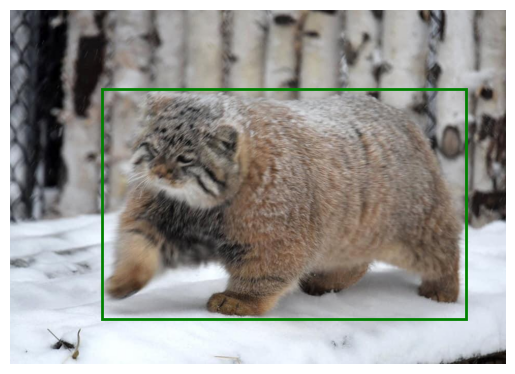

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image  # Use PIL to load images

# Load the image using PIL
image_path = "image_samples/pipeline-cat-chonk.jpeg"
image = Image.open(image_path)

# Define the box coordinates
xmin, ymin, xmax, ymax = 178, 154, 882, 598
width, height = xmax - xmin, ymax - ymin

# Create a Matplotlib figure
fig, ax = plt.subplots()
ax.imshow(image)

# Add a rectangle
rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='g', facecolor='none')
ax.add_patch(rect)

# Show the image with the rectangle
plt.axis("off")  # Hide axes
plt.show()


In [9]:
# Exercise: Repeat object detection on your own images
preds = detector(
    "image_samples/xyz_01.jpg"
)
preds

[{'score': 0.9942110776901245,
  'label': 'bottle',
  'box': {'xmin': 1492, 'ymin': 2211, 'xmax': 2052, 'ymax': 4507}}]

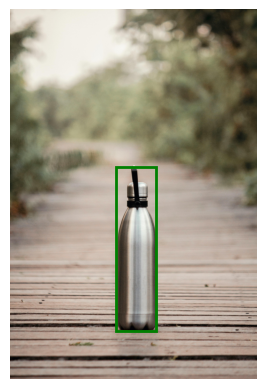

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image  # Use PIL to load images

# Load the image using PIL
image_path = "image_samples/xyz_01.jpg"
image = Image.open(image_path)

# Define the box coordinates
xmin, ymin, xmax, ymax = preds[0]['box']['xmin'], preds[0]['box']['ymin'], preds[0]['box']['xmax'], preds[0]['box']['ymax']  
width, height = xmax - xmin, ymax - ymin

# Create a Matplotlib figure
fig, ax = plt.subplots()
ax.imshow(image)

# Add a rectangle
rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='g', facecolor='none')
ax.add_patch(rect)

# Show the image with the rectangle
plt.axis("off")  # Hide axes
plt.show()

In [18]:
# Exercise: Repeat object detection on your own images
image_path = "image_samples/engineering_lab.jpg"
preds = detector(
    image_path
)
preds

[{'score': 0.9283885359764099,
  'label': 'mouse',
  'box': {'xmin': 371, 'ymin': 217, 'xmax': 388, 'ymax': 225}},
 {'score': 0.998907208442688,
  'label': 'person',
  'box': {'xmin': 684, 'ymin': 105, 'xmax': 746, 'ymax': 260}},
 {'score': 0.8966008424758911,
  'label': 'laptop',
  'box': {'xmin': 149, 'ymin': 138, 'xmax': 211, 'ymax': 191}},
 {'score': 0.9447228312492371,
  'label': 'person',
  'box': {'xmin': 413, 'ymin': 109, 'xmax': 433, 'ymax': 147}},
 {'score': 0.9962056875228882,
  'label': 'keyboard',
  'box': {'xmin': 295, 'ymin': 213, 'xmax': 380, 'ymax': 224}},
 {'score': 0.9914501309394836,
  'label': 'tv',
  'box': {'xmin': 308, 'ymin': 137, 'xmax': 381, 'ymax': 195}},
 {'score': 0.9986492991447449,
  'label': 'person',
  'box': {'xmin': 0, 'ymin': 79, 'xmax': 83, 'ymax': 369}},
 {'score': 0.5821095108985901,
  'label': 'laptop',
  'box': {'xmin': 78, 'ymin': 136, 'xmax': 206, 'ymax': 216}},
 {'score': 0.7505509257316589,
  'label': 'tv',
  'box': {'xmin': 146, 'ymin': 13

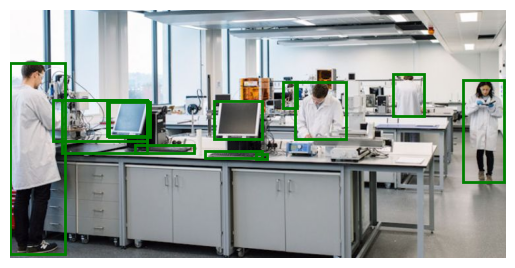

In [20]:
# Load the image using PIL
image = Image.open(image_path)


# Create a Matplotlib figure
fig, ax = plt.subplots()
ax.imshow(image)

for item in preds:
    # Define the box coordinates
    xmin, ymin, xmax, ymax = item['box']['xmin'], item['box']['ymin'], item['box']['xmax'], item['box']['ymax']  
    width, height = xmax - xmin, ymax - ymin

    # Add a rectangle
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='g', facecolor='none')
    ax.add_patch(rect)

# Show the image with the rectangle
plt.axis("off")  # Hide axes
plt.show()

### Image segmentation

In [6]:
from transformers import pipeline
segmenter = pipeline(task="image-segmentation")


No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision d53b52a (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrFor

In [7]:
image_path = "image_samples/pipeline-cat-chonk.jpeg"
preds = segmenter(
    image_path
)
preds

[{'score': 0.987885,
  'label': 'LABEL_184',
  'mask': <PIL.Image.Image image mode=L size=960x686>},
 {'score': 0.997345,
  'label': 'snow',
  'mask': <PIL.Image.Image image mode=L size=960x686>},
 {'score': 0.997247,
  'label': 'cat',
  'mask': <PIL.Image.Image image mode=L size=960x686>}]

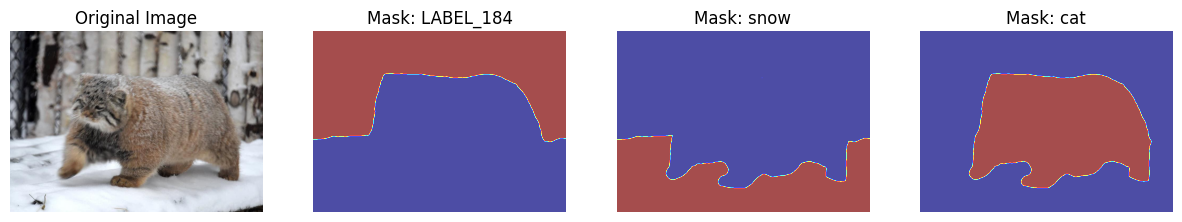

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image  # Use PIL to load images

# Load the image using PIL
image = Image.open(image_path)

# Plot original image
fig, axes = plt.subplots(1, len(preds) + 1, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Plot masks
for i, pred in enumerate(preds):
    mask = np.array(pred["mask"])  # Convert PIL mask to NumPy array
    axes[i + 1].imshow(mask, cmap="jet", alpha=0.7)  # Use colormap for visualization
    axes[i + 1].set_title(f"Mask: {pred['label']}")
    axes[i + 1].axis("off")

# Show the image with the rectangle
plt.axis("off")  # Hide axes
plt.show()

In [13]:
# Exercise: Test on your own images

image_path = "image_samples/xyz_01.jpg"
preds = segmenter(
    image_path
)
preds

[{'score': 0.979706,
  'label': 'LABEL_187',
  'mask': <PIL.Image.Image image mode=L size=3456x5184>},
 {'score': 0.997768,
  'label': 'LABEL_184',
  'mask': <PIL.Image.Image image mode=L size=3456x5184>},
 {'score': 0.987888,
  'label': 'vase',
  'mask': <PIL.Image.Image image mode=L size=3456x5184>}]

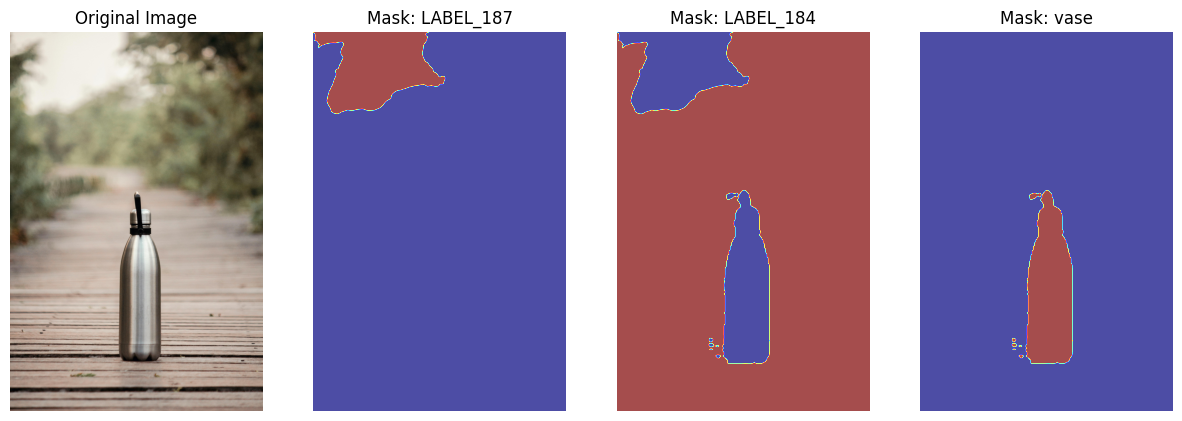

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image  # Use PIL to load images

# Load the image using PIL
image = Image.open(image_path)

# Plot original image
fig, axes = plt.subplots(1, len(preds) + 1, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Plot masks
for i, pred in enumerate(preds):
    mask = np.array(pred["mask"])  # Convert PIL mask to NumPy array
    axes[i + 1].imshow(mask, cmap="jet", alpha=0.7)  # Use colormap for visualization
    axes[i + 1].set_title(f"Mask: {pred['label']}")
    axes[i + 1].axis("off")

# Show the image with the rectangle
plt.axis("off")  # Hide axes
plt.show()

In [15]:
# Exercise: Test on your own images

image_path = "image_samples/engineering_lab.jpg"
preds = segmenter(
    image_path
)
preds

[{'score': 0.931728,
  'label': 'window-other',
  'mask': <PIL.Image.Image image mode=L size=750x375>},
 {'score': 0.998332,
  'label': 'tv',
  'mask': <PIL.Image.Image image mode=L size=750x375>},
 {'score': 0.999644,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=750x375>},
 {'score': 0.964524,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=750x375>},
 {'score': 0.982774,
  'label': 'LABEL_186',
  'mask': <PIL.Image.Image image mode=L size=750x375>},
 {'score': 0.92815,
  'label': 'mouse',
  'mask': <PIL.Image.Image image mode=L size=750x375>},
 {'score': 0.962049,
  'label': 'tv',
  'mask': <PIL.Image.Image image mode=L size=750x375>},
 {'score': 0.996157,
  'label': 'LABEL_190',
  'mask': <PIL.Image.Image image mode=L size=750x375>},
 {'score': 0.992602,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=750x375>},
 {'score': 0.938076,
  'label': 'light',
  'mask': <PIL.Image.Image image mode=L size=750x375>},
 {'score': 0.959322

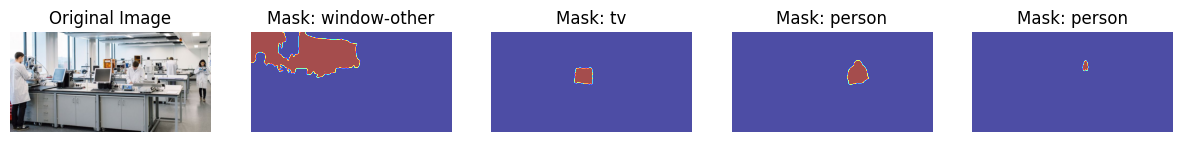

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image  # Use PIL to load images

# Load the image using PIL
image = Image.open(image_path)

# Plot original image
fig, axes = plt.subplots(1, len(preds[:4]) + 1, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Plot masks
for i, pred in enumerate(preds[:4]):
    mask = np.array(pred["mask"])  # Convert PIL mask to NumPy array
    axes[i + 1].imshow(mask, cmap="jet", alpha=0.7)  # Use colormap for visualization
    axes[i + 1].set_title(f"Mask: {pred['label']}")
    axes[i + 1].axis("off")

# Show the image with the rectangle
plt.axis("off")  # Hide axes
plt.show()

### Depth estimation

In [21]:
from transformers import pipeline

depth_estimator = pipeline(task="depth-estimation")


No model was supplied, defaulted to Intel/dpt-large and revision bc15f29 (https://huggingface.co/Intel/dpt-large).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/942 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

Device set to use cpu


In [22]:
preds = depth_estimator(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds

{'predicted_depth': tensor([[ 0.7947,  0.8027,  0.8192,  ...,  2.3555,  2.3328,  2.3244],
         [ 0.7955,  0.8010,  0.8126,  ...,  2.3456,  2.3306,  2.3249],
         [ 0.8008,  0.8025,  0.8062,  ...,  2.3333,  2.3296,  2.3279],
         ...,
         [26.4864, 26.4818, 26.4682,  ..., 17.3957, 17.4032, 17.4057],
         [26.5054, 26.5075, 26.5111,  ..., 17.4202, 17.4058, 17.3988],
         [26.5112, 26.5189, 26.5371,  ..., 17.4402, 17.4085, 17.3939]]),
 'depth': <PIL.Image.Image image mode=L size=960x686>}

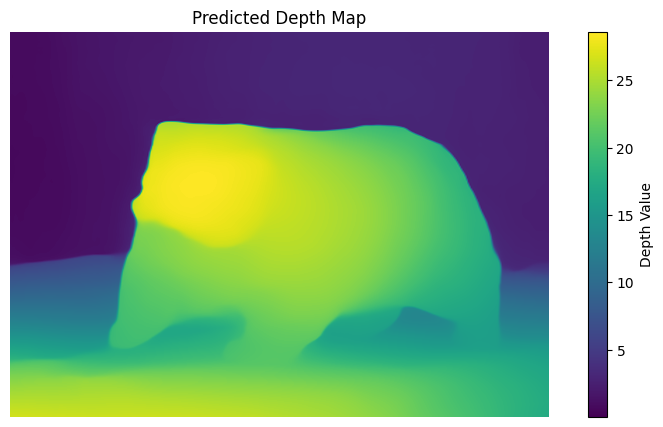

In [23]:
import torch
import matplotlib.pyplot as plt
import numpy as np


# Convert tensor to NumPy array
predicted_depth = preds["predicted_depth"].numpy()

# Plot predicted depth map
plt.figure(figsize=(10, 5))
plt.imshow(predicted_depth, cmap="viridis")  # "viridis" gives a nice depth effect
plt.colorbar(label="Depth Value")  # Adds a color scale for reference
plt.title("Predicted Depth Map")
plt.axis("off")
plt.show()

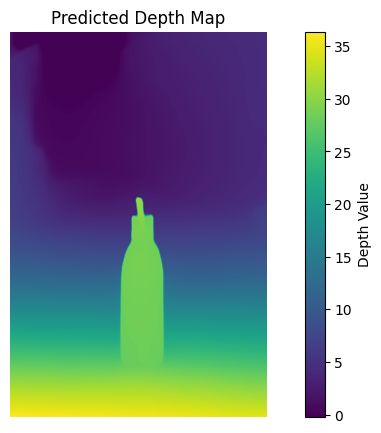

In [24]:
# exercise: own data 
image_path = "image_samples/xyz_01.jpg"
preds = depth_estimator( image_path)

# Convert tensor to NumPy array
predicted_depth = preds["predicted_depth"].numpy()

# Plot predicted depth map
plt.figure(figsize=(10, 5))
plt.imshow(predicted_depth, cmap="viridis")  # "viridis" gives a nice depth effect
plt.colorbar(label="Depth Value")  # Adds a color scale for reference
plt.title("Predicted Depth Map")
plt.axis("off")
plt.show()

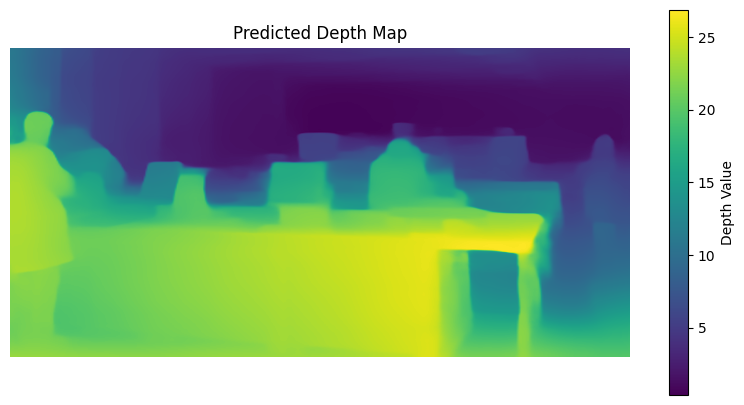

In [25]:
# Exercise: depth estimation on own data
# exercise: own data 
image_path = "image_samples/engineering_lab.jpg"
preds = depth_estimator( image_path)

# Convert tensor to NumPy array
predicted_depth = preds["predicted_depth"].numpy()

# Plot predicted depth map
plt.figure(figsize=(10, 5))
plt.imshow(predicted_depth, cmap="viridis")  # "viridis" gives a nice depth effect
plt.colorbar(label="Depth Value")  # Adds a color scale for reference
plt.title("Predicted Depth Map")
plt.axis("off")
plt.show()

# Natural Language Processing

## Sentiment analysis

Sample Applications:
- Reviews processing
- Market mood
- Political situation analysis


In [1]:
from transformers import pipeline
classifier = pipeline(task="sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [3]:
text = "Hugging face is awesome."
preds = classifier(text)
preds

[{'label': 'POSITIVE', 'score': 0.999876856803894}]

In [19]:
# exercise : Try your own texts
text = "I am getting good grades."
preds = classifier(text)
preds


[{'label': 'POSITIVE', 'score': 0.9998577833175659}]

## Token Classfication

In [21]:
from transformers import pipeline
classifier = pipeline(task="ner")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [22]:
preds = classifier("Hugging Face is a French company based in New York City.")
preds

[{'entity': 'I-ORG',
  'score': 0.9967675,
  'index': 1,
  'word': 'Hu',
  'start': 0,
  'end': 2},
 {'entity': 'I-ORG',
  'score': 0.929303,
  'index': 2,
  'word': '##gging',
  'start': 2,
  'end': 7},
 {'entity': 'I-ORG',
  'score': 0.9763209,
  'index': 3,
  'word': 'Face',
  'start': 8,
  'end': 12},
 {'entity': 'I-MISC',
  'score': 0.99828726,
  'index': 6,
  'word': 'French',
  'start': 18,
  'end': 24},
 {'entity': 'I-LOC',
  'score': 0.99896204,
  'index': 10,
  'word': 'New',
  'start': 42,
  'end': 45},
 {'entity': 'I-LOC',
  'score': 0.9986792,
  'index': 11,
  'word': 'York',
  'start': 46,
  'end': 50},
 {'entity': 'I-LOC',
  'score': 0.9992418,
  'index': 12,
  'word': 'City',
  'start': 51,
  'end': 55}]

In [23]:
preds = classifier("My name is Ajit Kumar. I live in Greater Noida")
preds

[{'entity': 'I-PER',
  'score': 0.9993316,
  'index': 4,
  'word': 'A',
  'start': 11,
  'end': 12},
 {'entity': 'I-PER',
  'score': 0.9994197,
  'index': 5,
  'word': '##jit',
  'start': 12,
  'end': 15},
 {'entity': 'I-PER',
  'score': 0.9996456,
  'index': 6,
  'word': 'Kumar',
  'start': 16,
  'end': 21},
 {'entity': 'I-LOC',
  'score': 0.99782467,
  'index': 11,
  'word': 'Greater',
  'start': 33,
  'end': 40},
 {'entity': 'I-LOC',
  'score': 0.99774086,
  'index': 12,
  'word': 'No',
  'start': 41,
  'end': 43},
 {'entity': 'I-LOC',
  'score': 0.9978569,
  'index': 13,
  'word': '##ida',
  'start': 43,
  'end': 46}]